In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import numpy as np
from sklearn.decomposition import PCA
plotly.tools.set_credentials_file(username='baccarclement', api_key='BYRdjGqNPKPho68L9tCi')

In [2]:
import pickle 
categorical_features = pickle.load(open( "../../../data/var_category.p", "rb" ))
numeric_features = pickle.load(open( "../../../data/var_continuous.p", "rb" ))

In [3]:
X = pd.read_csv("../../../data/X.csv")
target = pd.read_csv("../../../data/y.csv").target

In [4]:
#X = X[['age', 'sexe', 'diabetes', 'body_mass_index', 'month', 'diff transplantation sortie']]

In [5]:
def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    colors = {0: "red", 1: "grey"}
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= colors[label_id],
                    linewidth='12',
                    alpha=0.8
                    )
    plt.legend(loc='best')

In [6]:
X.drop(["atcd_medicaux", "atcd_chirugicaux"], axis = 1, inplace = True)

In [7]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(X)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)



pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

dim_reduc = tsne_result_scaled

No handles with labels found to put in legend.


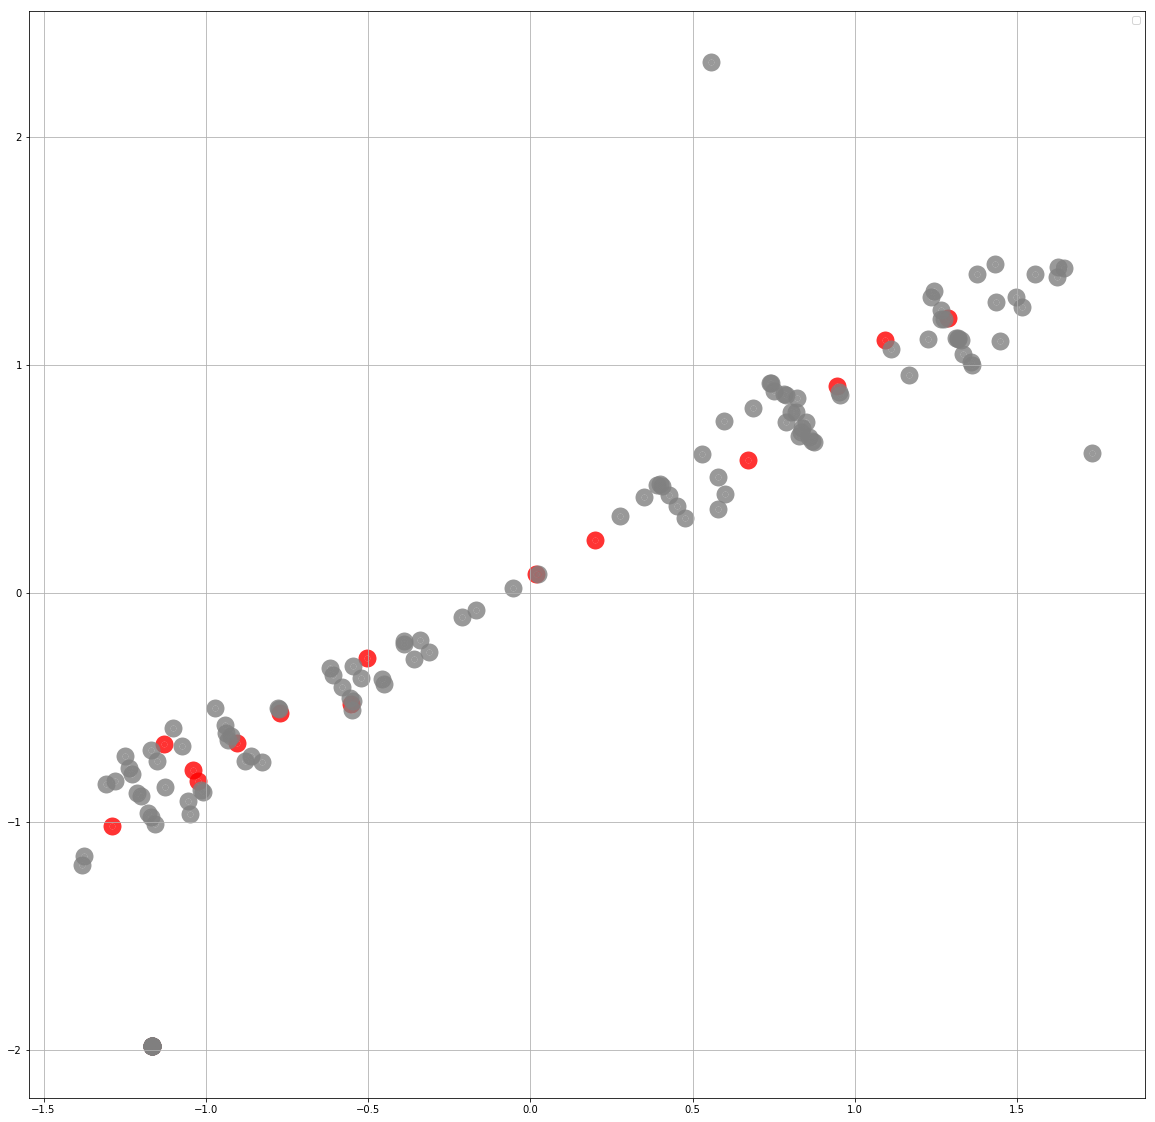

In [8]:
visualize_scatter(dim_reduc, target)

In [9]:
sne = TSNE(n_components=3)
tsne_result = sne.fit_transform(X)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

pca_df = pd.DataFrame(pca_result)
tsne_df = pd.DataFrame(tsne_result_scaled)

In [10]:
df = tsne_df

x, y, z = df[target == 0][0], df[target == 0][1], df[target == 0][2]
x2, y2, z2 = df[target == 1][0], df[target == 1][1], df[target == 1][2]

In [11]:
def D3_scatter(data) : 
    
    x = data["serie1"]["x"]
    y = data["serie1"]["y"]
    z = data["serie1"]["z"]
    
    x1 = data["serie2"]["x"]
    y1 = data["serie2"]["y"]
    z1 = data["serie2"]["z"]
    
    trace1 = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            color = '#CD5C5C',
            size=12,
            line=dict(
                color='#CD5C5C',
                width=0.5
            ),
            opacity=1
        )
    )

    trace2 = go.Scatter3d(
        x=x1,
        y=y1,
        z=z1,
        mode='markers',
        marker=dict(
            color='rgb(127, 127, 127)',
            size=12,
            symbol='circle',
            line=dict(
                color='rgb(204, 204, 204)',
                width=1
            ),
            opacity=0.9
        )
    )
    data = [trace1, trace2]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    return(fig)

In [12]:
from collections import defaultdict
data = defaultdict(dict)

data["serie1"]["x"] = x
data["serie1"]["y"] = y
data["serie1"]["z"] = z

data["serie2"]["x"] = x2
data["serie2"]["y"] = y2
data["serie2"]["z"] = z2

fig = D3_scatter(data)
py.iplot(fig, filename='simple-3d-scatter')